In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set()

In [5]:
def llr_test2(L1, L2, DF=1):
    LR = 2*(L2-L1)
    return chi2.sf(LR, DF).round(3)

In [6]:
raw_csv_data = pd.read_csv("Index2018.csv")
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst=True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method="ffill")

In [7]:
df_comp['market_value'] = df_comp.ftse

In [8]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

In [9]:
size = int(len(df_comp) * 0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

In [10]:
df['returns'] = df.market_value.pct_change(1).mul(100)
df = df.iloc[1:]
df

<ipython-input-10-5e33df958c32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1).mul(100)


,market_value,returns
date,,
1994-01-10,3440.58,-0.156704
1994-01-11,3413.77,-0.779229
1994-01-12,3372.02,-1.222988
1994-01-13,3360.01,-0.356166
1994-01-14,3400.56,1.206842
...,...,...
2013-04-01,6411.74,0.000000
2013-04-02,6490.66,1.230867
2013-04-03,6420.28,-1.084327


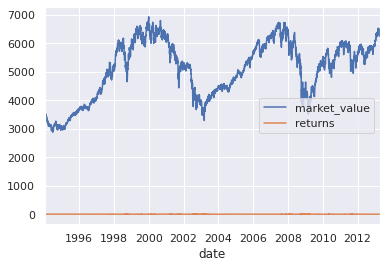

In [12]:
df.plot()

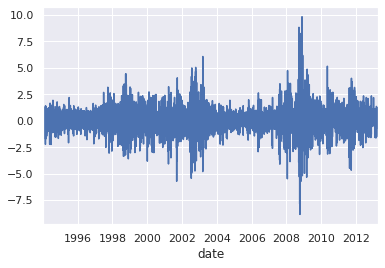

In [13]:
df.returns.plot()

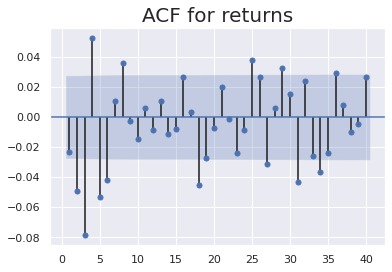

In [17]:
sgt.plot_acf(df.returns, lags=40, zero=False)
plt.title("ACF for returns", size=20)
plt.show()

In [18]:
model_ret_ma_1 = ARMA(df.returns, order=(0,1))
results_ret_ma_1 = model_ret_ma_1.fit()
results_ret_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Tue, 12 May 2020   AIC                          15865.190
Time:                        17:30:05   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8549           +0.0000j           38.8549            0.0000
-----------------------------------------------------------------------------
"""

In [19]:
model_ret_ma_2 = ARMA(df.returns, order=(0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
results_ret_ma_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Tue, 12 May 2020   AIC                          15853.728
Time:                        17:32:28   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     -3.669      0.000      -0.077      -0.023
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            4.1499           +0.0000j            4.1499            0.0000
MA.2           -4.8004           +0.0000j            4.8004            0.5000
-----------------------------------------------------------------------------
"""

In [20]:
llr_test2(results_ret_ma_1.llf, results_ret_ma_2.llf, 1)

0.0

In [21]:
model_ret_ma_6 = ARMA(df.returns, order=(0,6))
results_ret_ma_6 = model_ret_ma_6.fit()
results_ret_ma_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Tue, 12 May 2020   AIC                          15794.442
Time:                        17:35:17   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     -3.436      0.001      -0.076      -0.021
ma.L3.returns    -0.0827      0.014     -5.846      0.000      -0.110      -0.055
ma.L4.returns     0.0466      0.014      3.434      0.001       0.020       0.073
ma.L5.returns    -0.0484      0.014     -3.371      0.001      -0.077      -0.020
ma.L6.returns    -0.0387      0.014     -2.682      0.007      -0.067      -0.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.5011           -0.0000j            1.5011           -0.0000
MA.2            0.8248           -1.4775j            1.6921           -0.1690
MA.3            0.8248           +1.4775j            1.6921            0.1690
MA.4           -1.0066           -1.2260j            1.5863           -0.3594
MA.5           -1.0066           +1.2260j            1.5863            0.3594
MA.6           -2.3891           -0.0000j            2.3891           -0.5000
-----------------------------------------------------------------------------
"""

In [22]:
model_ret_ma_8 = ARMA(df.returns, order=(0,8))
results_ret_ma_8 = model_ret_ma_8.fit()
results_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Tue, 12 May 2020   AIC                          15791.205
Time:                        17:38:17   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.returns    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.returns     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.returns    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.returns    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.returns     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.returns     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

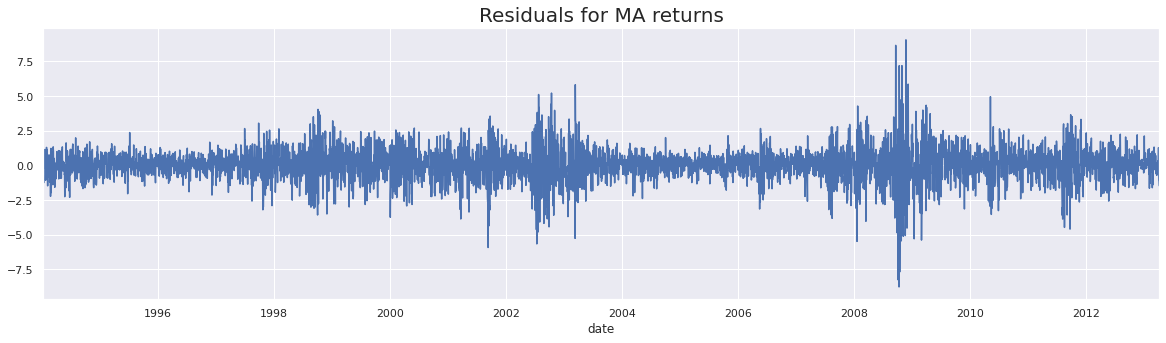

In [29]:
df['res_ret_ma_8'] = results_ret_ma_8.resid
df.res_ret_ma_8.plot(figsize=(20,5))
plt.title("Residuals for MA returns", size=20)
plt.show()

In [30]:
round(np.sqrt(df.res_ret_ma_8.var()), 3)

1.164

In [31]:
sts.adfuller(df.res_ret_ma_8)

(-70.83821855116418,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15689.881920578977)

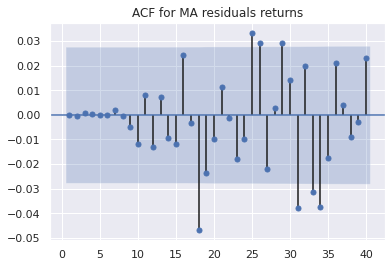

In [32]:
sgt.plot_acf(df.res_ret_ma_8, zero=False, lags=40)
plt.title("ACF for MA residuals returns")
plt.show()

## 2nd part ARMA MOdels

In [35]:
model_ret_ar_1_ma_1 = ARMA(df.returns, order=(1,1))
results_ret_ar_1_ma_1 = model_ret_ar_1_ma_1.fit()
results_ret_ar_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(1, 1)   Log Likelihood               -7916.500
Method:                       css-mle   S.D. of innovations              1.171
Date:                Tue, 12 May 2020   AIC                          15841.000
Time:                        18:05:20   BIC                          15867.085
Sample:                    01-10-1994   HQIC                         15850.140
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.446      0.148      -0.007       0.045
ar.L1.returns     0.7649      0.067     11.349      0.000       0.633       0.897
ma.L1.returns    -0.8141      0.061    -13.406      0.000      -0.933      -0.695
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3074           +0.0000j            1.3074            0.0000
MA.1            1.2284           +0.0000j            1.2284            0.0000
-----------------------------------------------------------------------------
"""

In [36]:
model_ret_ar_1=ARMA(df.returns, order=(1,0))
results_ret_ar_1=model_ret_ar_1.fit()

In [37]:
model_ret_ma_1=ARMA(df.returns, order=(0,1))
results_ret_ma_1=model_ret_ma_1.fit()

In [38]:
llr_test2(results_ret_ar_1.llf, results_ret_ar_1_ma_1.llf, 1)

0.0

In [39]:
llr_test2(results_ret_ma_1.llf, results_ret_ar_1_ma_1.llf, 1)

0.0

In [40]:
model_ret_ar_8_ma_8 = ARMA(df.returns, order=(8,8))
results_ret_ar_8_ma_8 = model_ret_ar_8_ma_8.fit()
results_ret_ar_8_ma_8.summary()

ValueError: The computed initial AR coefficients are not stationary
You should induce stationarity, choose a different model order, or you can
pass your own start_params.

In [41]:
model_ret_ar_3_ma_3 = ARMA(df.returns, order=(3,3))
results_ret_ar_3_ma_3 = model_ret_ar_3_ma_3.fit()
results_ret_ar_3_ma_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(3, 3)   Log Likelihood               -7893.515
Method:                       css-mle   S.D. of innovations              1.166
Date:                Tue, 12 May 2020   AIC                          15803.030
Time:                        18:16:32   BIC                          15855.199
Sample:                    01-10-1994   HQIC                         15821.310
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.395      0.163      -0.008       0.045
ar.L1.returns    -0.1898      0.104     -1.827      0.068      -0.393       0.014
ar.L2.returns    -0.2942      0.087     -3.389      0.001      -0.464      -0.124
ar.L3.returns     0.4459      0.138      3.225      0.001       0.175       0.717
ma.L1.returns     0.1707      0.099      1.726      0.084      -0.023       0.365
ma.L2.returns     0.2277      0.084      2.701      0.007       0.062       0.393
ma.L3.returns    -0.5432      0.127     -4.270      0.000      -0.793      -0.294
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.5168           -1.0283j            1.1508           -0.3241
AR.2           -0.5168           +1.0283j            1.1508            0.3241
AR.3            1.6932           -0.0000j            1.6932           -0.0000
MA.1           -0.5286           -0.9835j            1.1166           -0.3285
MA.2           -0.5286           +0.9835j            1.1166            0.3285
MA.3            1.4764           -0.0000j            1.4764           -0.0000
-----------------------------------------------------------------------------
"""

In [43]:
llr_test2(results_ret_ar_1_ma_1.llf, results_ret_ar_3_ma_3.llf, 4)

0.0

# Interaction with students multiparty computing
Calculating arma 2-3, 3-2, 5-1 and some more.
Grid search. Python package: `pmdarima`

ARMA modeling make sense only when data is **stationary**, next week extend model ARiMA model. i stands for order of differencing.

In [45]:
import pmdarima

### Homewrok
Construct arma model of chosen order and according to the simplified formula on the screen try to determine arma model compatible with initial choice of the parameters. Theta 1 and fi 1 should be  in (1,1) set shock from normal distr mean 0 std 1, generate arma time series, make sure its not blowig up to infinity, try the ARMA models on that.